In [1]:
# Download dependencies here


In [2]:
# Importing the libraries 
import pandas as pd
import missingno as msno 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [3]:
# 1. Data Exploration Phase

In [4]:
# Importing dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

In [5]:
# Previewing the dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Previewing the dataset
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [7]:
# Getting the columns and rows of the dataset
df.shape

(6607, 20)

In [8]:
# Viewing datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
# Describe the dataset
df.describe(include = 'all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


In [10]:
# 2. Initial Data Preprocessing

In [11]:
# Checking the amount of missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [12]:
# Checking the percentage of missing values
df.isnull().sum() / df.shape[0] * 100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

<Axes: >

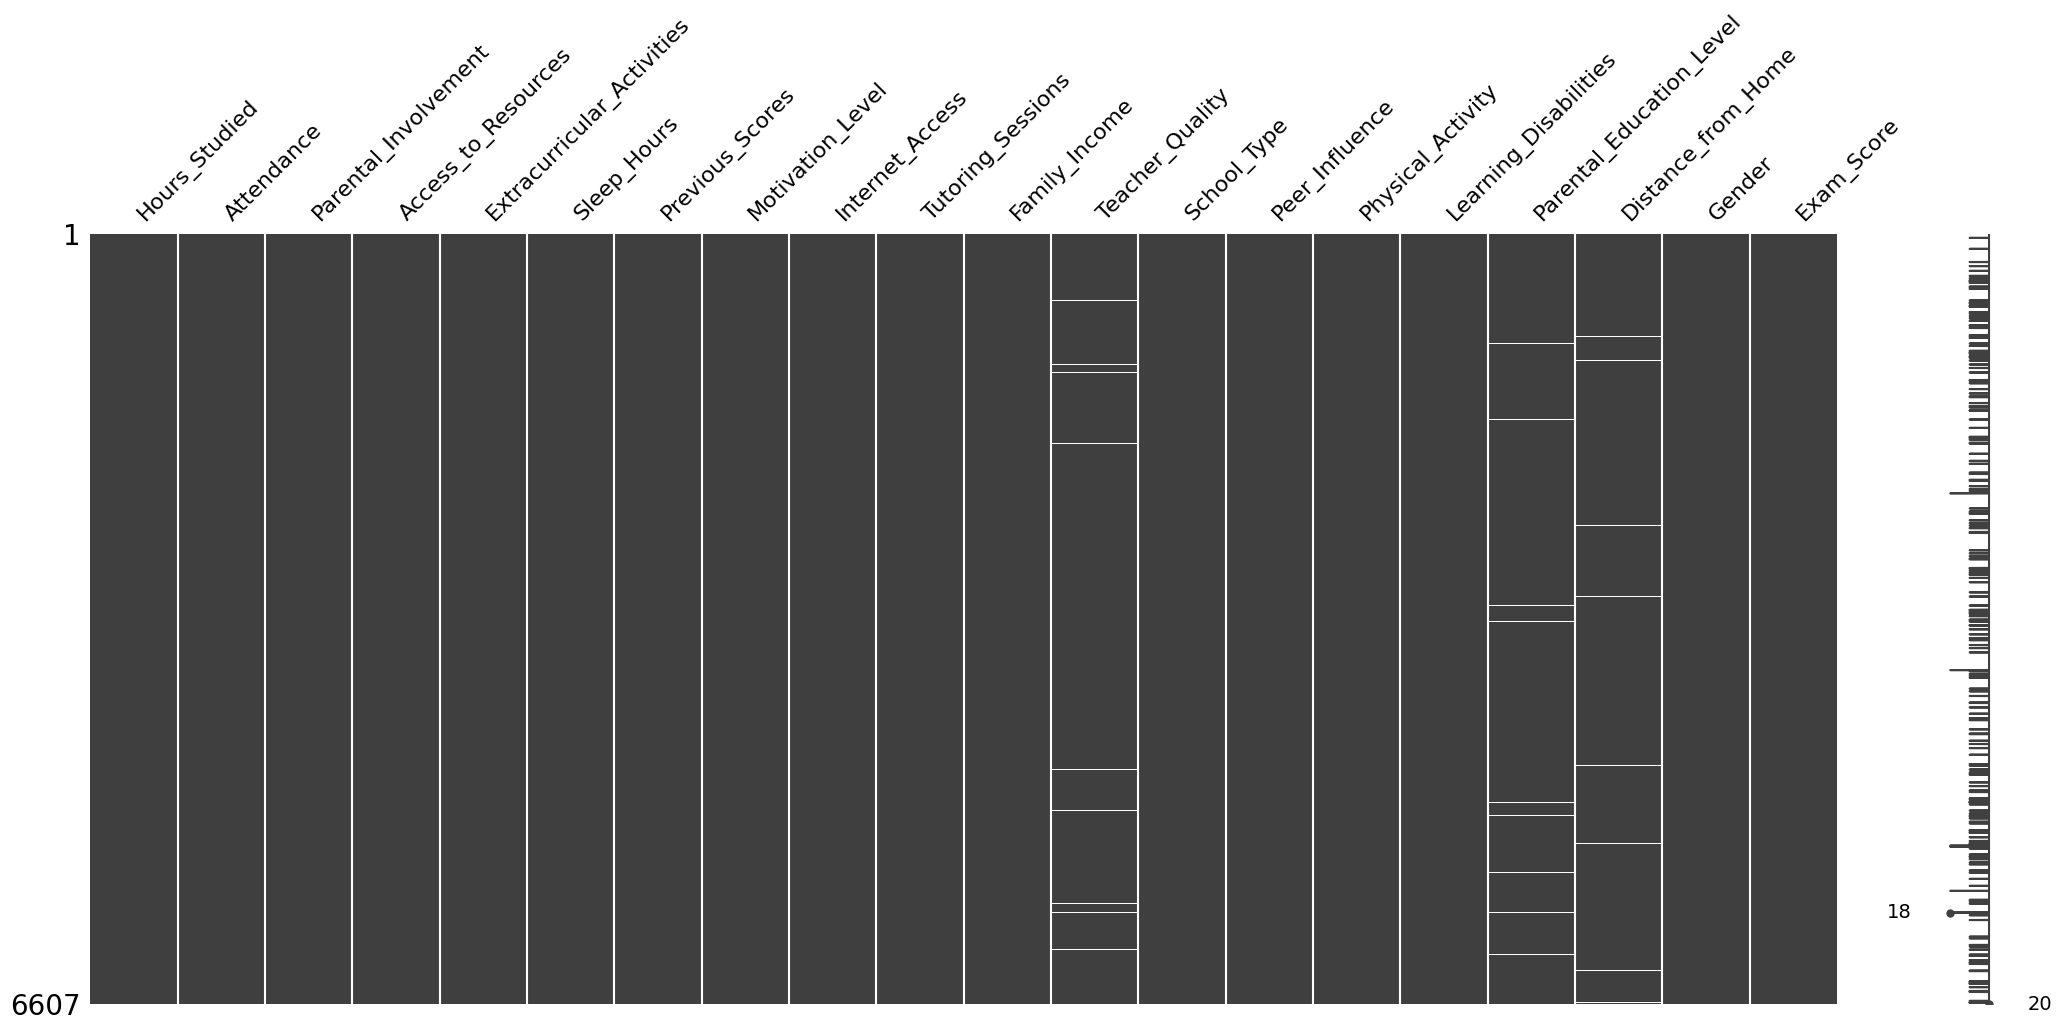

In [13]:
# Visualizing the number of missing values using matrix
msno.matrix(df)

In [14]:
# Dropping missing values for now
df.dropna(inplace=True)

In [15]:
# Using label encoding to translate data values from 0 - 2
ordinal_encoder = OrdinalEncoder(categories = [['Low', 'Medium', 'High']])
df['Parental_Involvement'] = ordinal_encoder.fit_transform(df[['Parental_Involvement']])
df['Access_to_Resources'] = ordinal_encoder.fit_transform(df[['Access_to_Resources']])
df['Motivation_Level'] = ordinal_encoder.fit_transform(df[['Motivation_Level']])
df['Family_Income'] = ordinal_encoder.fit_transform(df[['Family_Income']])
df['Teacher_Quality'] = ordinal_encoder.fit_transform(df[['Teacher_Quality']])

In [16]:
# Using label encoding to translate data values from 0 - 2
ordinal_encoder = OrdinalEncoder(categories = [['Negative', 'Neutral', 'Positive']])
df['Peer_Influence'] = ordinal_encoder.fit_transform(df[['Peer_Influence']])

In [17]:
# Using label encoding to translate data values from 0 - 2
ordinal_encoder = OrdinalEncoder(categories = [['High School', 'College', 'Postgraduate']])
df['Parental_Education_Level'] = ordinal_encoder.fit_transform(df[['Parental_Education_Level']])

In [18]:
# Using label encoding to translate data values from 0 - 2
ordinal_encoder = OrdinalEncoder(categories = [['Near', 'Moderate', 'Far']])
df['Distance_from_Home'] = ordinal_encoder.fit_transform(df[['Distance_from_Home']])

In [19]:
# Using binary encoding to translate data values from 0 - 1
ordinal_encoder = OrdinalEncoder(categories = [['No', 'Yes']])
df['Extracurricular_Activities'] = ordinal_encoder.fit_transform(df[['Extracurricular_Activities']])
df['Internet_Access'] = ordinal_encoder.fit_transform(df[['Internet_Access']])
df['Learning_Disabilities'] = ordinal_encoder.fit_transform(df[['Learning_Disabilities']])

In [20]:
# Using binary encoding to translate data values from 0 - 1
ordinal_encoder = OrdinalEncoder(categories = [['Public', 'Private']])
df['School_Type'] = ordinal_encoder.fit_transform(df[['School_Type']])

In [21]:
# Using binary encoding to translate data values from 0 - 1
ordinal_encoder = OrdinalEncoder(categories = [['Male', 'Female']])
df['Gender'] = ordinal_encoder.fit_transform(df[['Gender']])

In [22]:
# Transform Exam_Score to a categorical variable
bins = [0, 59, 69, 79, 89, 100]
labels = ['E', 'D', 'C', 'B', 'A']
df['Exam_Score'] = pd.cut(df['Exam_Score'], bins=bins, labels=labels, right=True)

In [23]:
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,2.0,0.0,7,73,0.0,1.0,0,0.0,1.0,0.0,2.0,3,0.0,0.0,0.0,0.0,D
1,19,64,0.0,1.0,0.0,8,59,0.0,1.0,2,1.0,1.0,0.0,0.0,4,0.0,1.0,1.0,1.0,D
2,24,98,1.0,1.0,1.0,7,91,1.0,1.0,2,1.0,1.0,0.0,1.0,4,0.0,2.0,0.0,0.0,C
3,29,89,0.0,1.0,1.0,8,98,1.0,1.0,1,1.0,1.0,0.0,0.0,4,0.0,0.0,1.0,0.0,C
4,19,92,1.0,1.0,1.0,6,65,1.0,1.0,3,1.0,2.0,0.0,1.0,4,0.0,1.0,0.0,1.0,C
5,19,88,1.0,1.0,1.0,8,89,1.0,1.0,3,1.0,1.0,0.0,2.0,3,0.0,2.0,0.0,0.0,C
6,29,84,1.0,0.0,1.0,7,68,0.0,1.0,1,0.0,1.0,1.0,1.0,2,0.0,0.0,1.0,0.0,D
7,25,78,0.0,2.0,1.0,6,50,1.0,1.0,1,2.0,2.0,0.0,0.0,2,0.0,0.0,2.0,0.0,D
8,17,94,1.0,2.0,0.0,6,80,2.0,1.0,0,1.0,0.0,1.0,1.0,1,0.0,1.0,0.0,0.0,D
9,23,98,1.0,1.0,1.0,8,71,1.0,1.0,0,2.0,2.0,0.0,2.0,5,0.0,0.0,1.0,0.0,C


In [24]:
%store df

Stored 'df' (DataFrame)
